**Name**    : Richard Edgina Virgo  
**Batch**   : 006

---

Saya dari seorang data scientist dari perusahaan X, yang ingin membuat model yang memprediksi harga taksi. Program ini saya buat untuk membuat dan mengevaluasi model pembelajaran mesin yang dibuat berdasarkan data Uber and Lyft dataset Boston, MA yang diambil di Kaggle. Set data ini terdiri berbagai informasi mengenai harga Uber dan Lyft beserta kondisi. In order to analyse the data, the SMART method will be used, namely make machine learning model for prediction price for uber and Lyft, Using MAE and R2 Score to evaluate model, Using MAE and R2score successfully make model with minimal error, successfully make model and evaluate it before Saturday at 23:59.

---
---

<vspace>

### ***Import Libraries***
---

Mengimport semua libraries yang diperlukan dalam pembuatan model

In [176]:
# Importing pandas to load data
import pandas as pd
# Importing seaborn to plot data
import seaborn as sns
# Importing matplotlib to plot data
import matplotlib.pyplot as plt
# Importing scipy to mathematical equation
from scipy import stats
# Importing numpy for array
import numpy as np
# Importing phik for correlation analysis
import phik
from phik import resources, report
# Importing seaborn for visualization
import seaborn as sns
# Importing MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler
# Importing OrdinalEncoder for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# Importing OneHotEncoder for One hot Encoding
from sklearn.preprocessing import OneHotEncoder
# Importing LinearRegression for linear regression
from sklearn.linear_model import LinearRegression
# Importing Mean Absolute Error and R2 score to evaluation model
from sklearn.metrics import mean_absolute_error, r2_score
# Importing statsmodel.api as sm for QQ plot
import statsmodels.api as sm
# Import pickle and json for saving and loading data
import pickle
import json
# Import warning for controlling warning
import warnings

Langkah pertama adalah mendapatkan data, proses pemuatan data adalah sebagai berikut:

---
---

<vspace>

## ***Data Loading***
---

Loading data Uber and Lyft dataset Boston, MA

In [177]:
# Show the data frame
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Data berisikan 693071 baris dan 57 kolom. Sekarang saya akan mengubah 5 nama kolom , yaitu destination, cab_type, distance, name, and surge_multiplier. Pengubahan 5 kolom ini dilakukan, dikarenakan 5 kolom ini menjadi sangat penting di dalam pembuatan model

In [178]:
# Mengubah nama destination menjad destinasi
df.rename(columns = {'destination':'destinasi'}, inplace = True)
# Mengubah nama cab_type menjadi tipe taksi
df.rename(columns = {'cab_type':'tipe_taksi'}, inplace = True)
# Mengubah nama name menjadi nama
df.rename(columns = {'name':'nama'}, inplace = True)
# Mengubah nama distance menjadi jarak
df.rename(columns = {'distance':'jarak'}, inplace = True)
# Mengubah nama surge_multiplier menjadi lonjakan pengali
df.rename(columns = {'surge_multiplier':'lonjakan_pengali'}, inplace = True)

Setelah loading data dilakukan, selanjutnya masuk ke tahap data eksplorasi

---
---

<vspace>

## ***Data Exploration***

---

In [179]:
# melihat informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destinasi                    693071 non-null  object 
 9   tipe_taksi                   693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  nama                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [180]:
# Melihat ukuran data frame
df.shape

(693071, 57)

In [181]:
# Melihat kolom kolom yang terdapat data frame
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destinasi', 'tipe_taksi', 'product_id', 'nama', 'price',
       'jarak', 'lonjakan_pengali', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperature

Selanjutnya melihat data duplikat yang terdapat di data frame

In [182]:
# melihat data banyak data duplikat di data frame
df.duplicated().sum()

0

Didapat data duplikat sebanyak 0

Penghapusan kolom yang tidak diperlukan dalam analisis prediksi harga

In [183]:
df = df.drop(['id'], axis=1)

Kolom id dihapus dikarenakan id mengikuti fitur - fitur lain dan tidak independen. 

Penghapusan kolom timezone

In [184]:
df['timezone'].unique()

array(['America/New_York'], dtype=object)

In [185]:
df = df.drop('timezone', axis=1)

Penghapusan kolom timezone dikarenakan timezone yang terdapat di dalam data hanya 1

---
---

Model inference digunakan untuk memprediksi harga dengan mengambil data random. Pengambilan data dilakukan sekarang agar data tersebut tidak dipakai ke dalam train dan tes

### ***Model Inference***

In [186]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df.sample(1, random_state=0)

# menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['price'], axis=1, inplace=True)

<vspace>

## ***Explanatory Data Analysis***

---

Berikut adalah data frame setelah kolom/fitur id dan timezone dibuang

In [187]:
df

,timestamp,hour,day,month,datetime,source,destinasi,tipe_taksi,product_id,nama,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### **1. Apa harga dan jarak pada data?**

Untuk melihat distribusi harga dan jarak pada data, divisualisasikan melalui histogram dan boxplot

Text(0.5, 1.0, 'Boxplot of price')

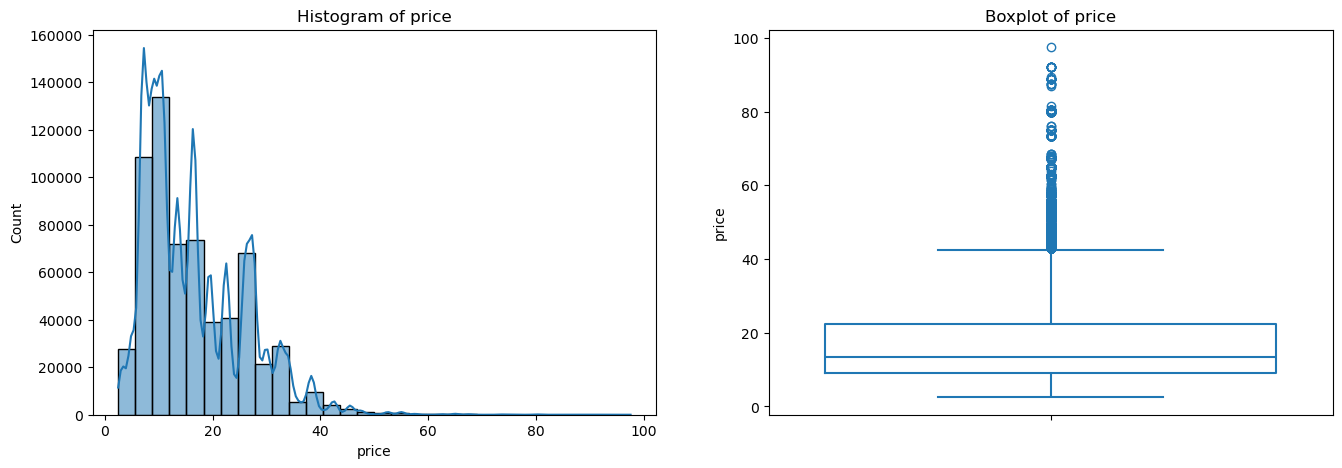

In [188]:
# Membuat Histogram
plt.figure(figsize=(16,5))
# Membuat subplot
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins = 30)
# Membuat judul
plt.title('Histogram of price')
# Membuat boxplot 
plt.subplot(1,2,2)
sns.boxplot(df['price'], fill=False)
plt.title('Boxplot of price')

Dari gambar histogram di atas menunjukkan bahwa distribusi price skewed ke kanan. Dari Boxplot di atas menunjukkan bahwa terdapat banyak outlier. Boxplot di atas juga menunjukkan Q1, Q2, dan Q3. 

In [189]:
# Menguji skewness
df['price'].skew()

1.0457446392622425

Didapat skewness adalah 1.0457 > 1, sehingga dapat dikatakan bahwa data ekstrim skewed ke kanan

In [190]:
# Mendeskripsikan data 
df['price'].describe()

count    637975.000000
mean         16.545134
std           9.324363
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Diketahui bahwa Q1 adalah 9, median sebesar 13.5 dan Q3 sebesar 22.5. 

Sekarang, visualisasi data jarak 

Text(0.5, 1.0, 'Boxplot of jarak')

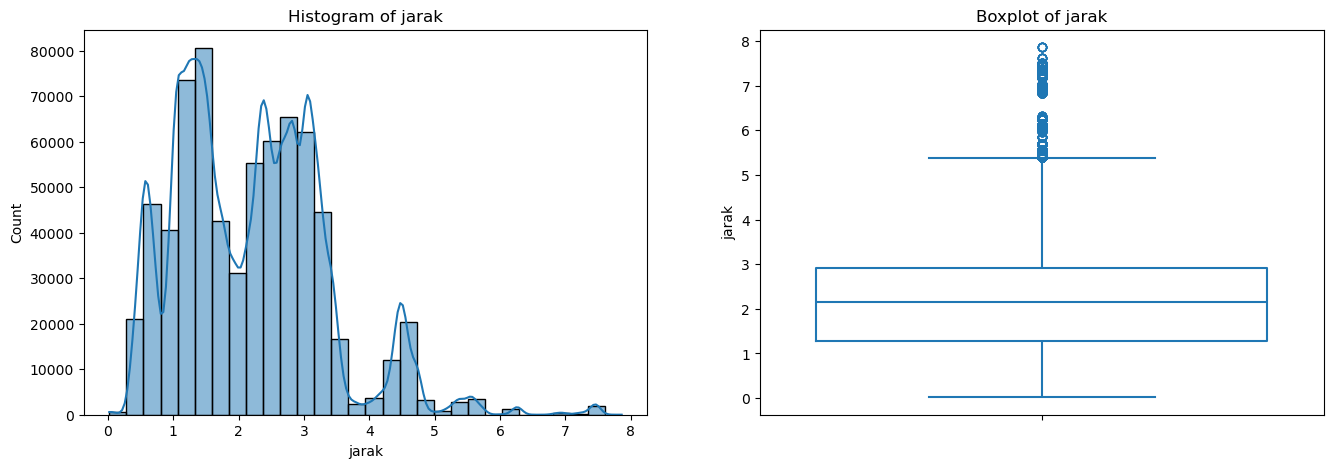

In [191]:
# Membuat Histogram
plt.figure(figsize=(16,5))
# Membuat subplot
plt.subplot(1,2,1)
sns.histplot(df['jarak'], kde=True, bins = 30)
# Membuat judul
plt.title('Histogram of jarak')
# Membuat boxplot distance
plt.subplot(1,2,2)
sns.boxplot(df['jarak'], fill=False)
plt.title('Boxplot of jarak')

Dari gambar histogram di atas menunjukkan bahwa distribusi jarak sedikit skewed ke kanan. Dari Boxplot di atas menunjukkan bahwa terdapat banyak outlier. Boxplot di atas juga menunjukkan Q1, Q2, dan Q3. 

In [192]:
# Menguji skewness
df['jarak'].skew()

0.8343932962766487

Didapat skewness adalah 0.8343 > 1, sehingga dapat dikatakan bahwa data skewed ke kanan

In [193]:
# Mendeskripsikan data 
df['jarak'].describe()

count    693070.000000
mean          2.189431
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: jarak, dtype: float64

Diketahui bahwa Q1 adalah 1.28, median sebesar 2.16 dan Q3 sebesar 2.92. 

### **2. Distribusi lonjakan pengali di data**

Untuk melihat distribusi lonjakan pengali pada data, divisualisasikan melalui histogram dan boxplot

Text(0.5, 1.0, 'Boxplot of lonjakan pengali')

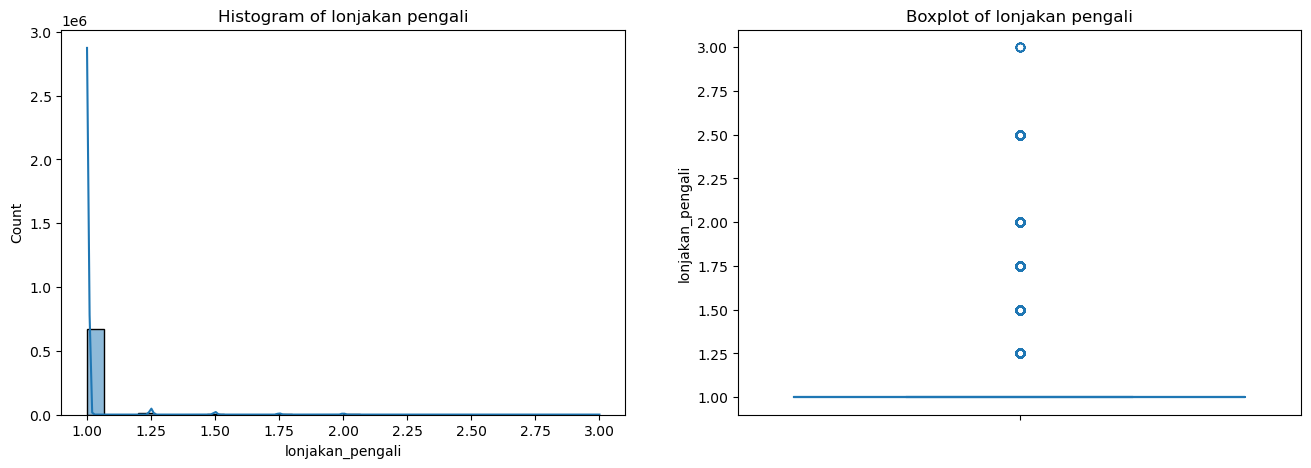

In [194]:
# Membuat Histogram
plt.figure(figsize=(16,5))
# Membuat subplot
plt.subplot(1,2,1)
sns.histplot(df['lonjakan_pengali'], kde=True, bins = 30)
# Membuat judul
plt.title('Histogram of lonjakan pengali')
# Membuat boxplot surge multiplier
plt.subplot(1,2,2)
sns.boxplot(df['lonjakan_pengali'], fill=False)
plt.title('Boxplot of lonjakan pengali')

Dari gambar histogram di atas menunjukkan bahwa distribusi surge multiplier sangat ekstrim skewed ke kanan. Dari Boxplot di atas menunjukkan bahwa terdapat outlier. Boxplot di atas menunjukkan bahwa Q1, Q2, dan Q3 sebesar 1

In [195]:
# Menguji skewness
df['lonjakan_pengali'].skew()

8.320241806468267

Didapat skewness adalah 8.32 > 1, sehingga dapat dikatakan bahwa data sangat ekstrim skewed ke kanan

In [196]:
# Mendeskripsikan data 
df['lonjakan_pengali'].describe()

count    693070.000000
mean          1.013870
std           0.091641
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: lonjakan_pengali, dtype: float64

Diketahui bahwa Q1, Q2, dan Q3 sebesar 1

### ***3. Nama Taksi dengan rata - rata harga tertinggi***

In [197]:
# Group by berdasarkan nama dan harga
Taksi = df.groupby(['nama'])['price'].mean()
Taksi = Taksi.sort_values(ascending=False)
Taksi

nama
Lux Black XL    32.324086
Black SUV       30.286763
Lux Black       23.062468
Black           20.523786
Lux             17.771240
UberXL          15.678144
Lyft XL         15.309363
UberX            9.765052
WAV              9.765019
Lyft             9.610885
UberPool         8.752500
Shared           6.029893
Taxi                  NaN
Name: price, dtype: float64

Visualisasi menggunakan bar horizontal plot

<Axes: ylabel='nama'>

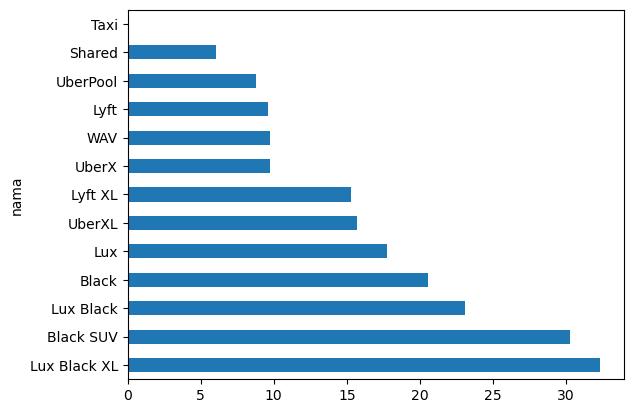

In [198]:
Taksi.plot(kind='barh')

Didapat Taksi yang memiliki rata rata harga paling mahal adalah Lux Black XL

### ***4. Destinasi yang paling banyak dikunjungi***

In [199]:
# Group by berdasarkan destinasi
Destination = df.groupby(['destinasi'])['destinasi'].count()
Destination = Destination.sort_values(ascending=False)
Destination

destinasi
Financial District         58851
Theatre District           57798
Back Bay                   57780
Boston University          57764
Haymarket Square           57764
Fenway                     57757
North End                  57755
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destinasi, dtype: int64

Visualisasi menggunakan bar horizontal plot

<Axes: ylabel='destinasi'>

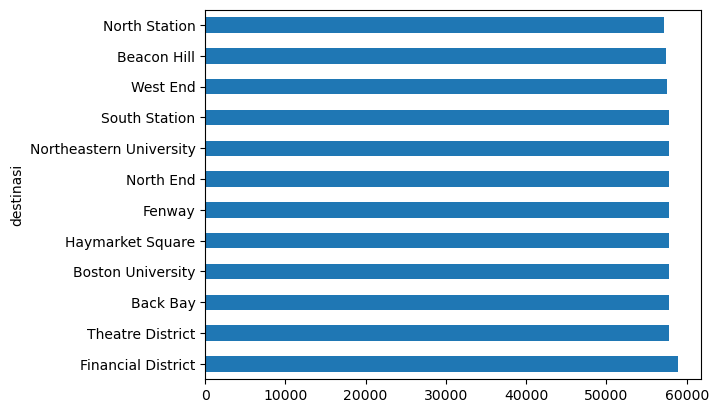

In [200]:
Destination.plot(kind='barh')

Didapat destinasi yang paling banyak dikunjungi adalah Financial District

Setelah EDA dilakukan, Feature Engineering dilakukan

---
---

<vspace>

## ***Feature Engineering***

---

Hal pertama dilakukan adalah memisahkan data label/target dengan data lainnya

In [201]:
# Membuat data X tanpa price
X = df.drop('price', axis=1)
# Membuat data y yang hanya price
y = df['price']

Setelah pemisahan data dilakukan, selanjutnya data akan dipisahkan menjadi data train dan tes

In [202]:
# Menggunakan sklearn untuk split data
from sklearn.model_selection import train_test_split
# Split data menjadi X_train, X_test, y_train, y_test dengan ukuran tes sebesar 0.2 atau sebanyak 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
# Menampilkan ukuran data train dan tes
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
# Memanggil X_train
X_train

Train size :  (554456, 54)
Test size :  (138614, 54)


,timestamp,hour,day,month,datetime,source,destinasi,tipe_taksi,product_id,nama,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
120144,1.543822e+09,7,3,12,2018-12-03 07:22:58,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
424231,1.545132e+09,11,18,12,2018-12-18 11:15:10,Beacon Hill,South Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
462379,1.545041e+09,10,17,12,2018-12-17 10:05:11,Northeastern University,Back Bay,Lyft,lyft_premier,Lux,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
517429,1.543254e+09,17,26,11,2018-11-26 17:32:09,North Station,North End,Lyft,lyft_plus,Lyft XL,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
23107,1.543457e+09,2,29,11,2018-11-29 02:11:07,Haymarket Square,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,1.543346e+09,19,27,11,2018-11-27 19:18:22,South Station,Financial District,Lyft,lyft_plus,Lyft XL,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
491263,1.543273e+09,22,26,11,2018-11-26 22:51:10,Beacon Hill,Fenway,Lyft,lyft,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
470924,1.544800e+09,15,14,12,2018-12-14 15:05:10,Fenway,West End,Lyft,lyft_premier,Lux,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
491755,1.543459e+09,2,29,11,2018-11-29 02:38:08,Beacon Hill,Northeastern University,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800


Didapat ukuran data Train adalah (554456, 54) dan ukuran data tes adalah (138615, 54). Setelah pembagian dilakukan, selanjutnya dilakukan missing value handling  


---

<vspace>

### ***Missing Value Handling***
---

Pertama melihat missing value dari X train dan X_test

In [203]:
# Melihat data null dari X_train
X_train.isnull().sum().sum()

0

In [204]:
# Melihat data null dari X_test
X_test.isnull().sum().sum()

0

Karena X train dan X test tidak mempunyai missing value, selanjutnya dlihat apakah y train dan y test memiliki data null

In [205]:
y_train.isnull().sum()

44206

In [206]:
y_test.isnull().sum()

10889

Data null y_train sebanyak 44100 dan y_test sebanyak 10995. Karena label atau target terdapat missing value, maka akan di drop missing value  y_train dan y_test tersebut

In [207]:
# Indeks y_train yang terdapat missing value
y_train_null_index = y_train[y_train.isnull()].index

Selanjutnya setelah mendapatkan indeks missing value y_train, selanjutnya dibuang kolom x_train berdasarkan indeks missing value y_train

In [208]:
# Membuang kolom berdasarkan indeks missing value y_train
X_train.drop(y_train_null_index, inplace=True)

Selanjutnya Missing value yang terdapat di y_train dihapus

In [209]:
# Menghapus missing value
y_train.dropna(inplace=True)
y_train

120144    27.5
424231    16.0
462379    16.5
517429     9.0
23107     10.5
          ... 
371403    11.0
491263     9.0
470924    16.5
491755     9.5
128037     8.5
Name: price, Length: 510250, dtype: float64

Hal yang sama dilakukan pada X_test dan y_test

X_test drop baris berdasarkan kolom y_test yang di drop

In [210]:
# Membuang kolom berdasarkan indeks missing value y_train
y_test_null_index = y_test[y_test.isnull()].index

Selanjutnya setelah mendapatkan indeks missing value y_train, selanjutnya dibuang kolom x_train berdasarkan indeks missing value y_train

In [211]:
X_test.drop(y_test_null_index, inplace=True)

Selanjutnya Missing value yang terdapat di y_test dihapus

In [212]:
y_test.dropna(inplace=True)
y_test

541064    10.5
215250    22.5
454530    26.0
150598    25.0
569129    20.5
          ... 
386689    10.5
493955     6.5
96764      7.0
653442    26.5
194915     6.5
Name: price, Length: 127725, dtype: float64

Selanjutnya dilakukan outlier handling

---

<vspace>

### ***Outlier Handling and Feature selection***

---

In [213]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510250 entries, 120144 to 128037
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    510250 non-null  float64
 1   hour                         510250 non-null  int64  
 2   day                          510250 non-null  int64  
 3   month                        510250 non-null  int64  
 4   datetime                     510250 non-null  object 
 5   source                       510250 non-null  object 
 6   destinasi                    510250 non-null  object 
 7   tipe_taksi                   510250 non-null  object 
 8   product_id                   510250 non-null  object 
 9   nama                         510250 non-null  object 
 10  jarak                        510250 non-null  float64
 11  lonjakan_pengali             510250 non-null  float64
 12  latitude                     510250 non-null  float64
 13 

Sebelum handling outlier dilakukan, dapat dilihat bahwa lonjakan_pengali mempunyai tipe data float, seharusnya lonjakan_pengali mempunyai tipe data string, dikarenakan lonjakan_pengali hanya memiliki beberapa nilai yang unik

In [214]:
# memperlihatkan nilai unik dari lonjakan pengali
X_train['lonjakan_pengali'].unique()

array([1.  , 1.25, 2.  , 1.5 , 1.75, 2.5 , 3.  ])

Dapat dilihat bahwa lonjakan_pengali hanya memiliki 7 nilai unik dan tidak kontinu, sehingga tipe data harus diubah menjadi string

In [215]:
# Mengubah tipe data menjadi string
X_train['lonjakan_pengali'] = X_train['lonjakan_pengali'].astype(str)
X_test['lonjakan_pengali'] = X_test['lonjakan_pengali'].astype(str)

Selanjutnya akan dilakukan handling outlier. Handling Outlier dilakukan berdasarkan tipe distribusi data, apakah normal, skewed, dan juga ekstrim skewed. Cara handling outlier juga berbeda berdasarkan persentase dari outlier. Jika persentase outlier < 5 %, maka outlier data di trimming sedangkan jika lebih dari 5 %, maka outlier akan dicapping

In [216]:
# Membuat fungsi untuk melakukan handling outlier
def handling_outlier(X_train):  
    '''
    Fungsi ini dibuat untuk melakukan handling outlier berdasarkan distribusi data dan persentase outlier
    '''
    # Mengambil nama kolom dari X_train bertipe data numerik
    for i in X_train.select_dtypes(include=np.number).columns.tolist():
        # Kondisi untuk distribusi normal
        if X_train[i].nunique() > 80:
            if -0.5 <= X_train[i].skew() <= 0.5:
                # Menghitung up boundary , low boundary , dan outlier
                up_bound = X_train[i].mean() + 3 * X_train[i].std()
                low_bound = X_train[i].mean() - 3 * X_train[i].std()
                outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier <= 0.05, maka outlier di trimming
                if len(outlier)/len(X_train[i]) <= 0.05:
                    X_train = X_train[(X_train[i]>=low_bound) & (X_train[i]<=up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier > 0.05, maka outlier di capping
                else:
                    X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound) 
            # Kondisi untuk distribusi skewed
            elif -1 <= X_train[i].skew() < -0.5 or 0.5 < X_train[i].skew() <= 1:
                # Menghitung up boundary , low boundary , dan outlier
                up_bound =  X_train[i].quantile(0.25) + 1.5 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
                low_bound =  X_train[i].quantile(0.25) - 1.5 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
                outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier <= 0.05, maka outlier di trimming
                if len(outlier)/len(X_train[i]) <= 0.05:
                    X_train = X_train[(X_train[i]>=low_bound) & (X_train[i]<=up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier > 0.05, maka outlier di capping
                else:
                    X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound)
            # Kondisi untuk distribusi ekstrim skewed 
            elif X_train[i].skew() < -1 or X_train[i].skew() > 1:
                # Menghitung up boundary , low boundary , dan outlier
                up_bound =  X_train[i].quantile(0.25) + 3 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
                low_bound =  X_train[i].quantile(0.25) - 3 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
                outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier <= 0.05, maka outlier di trimming
                if len(outlier)/len(X_train[i]) <= 0.05:
                    X_train = X_train[(X_train[i]>=low_bound) & (X_train[i]<=up_bound)]
                # membuat kondisi berdasarkan persentase outlier, jika persentase outlier > 0.05, maka outlier di capping
                else:
                    X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound) 
    return X_train

Selanjutnya akan dipanggul fungsi handling_outlier

In [217]:
# Pemanggilan fungsi handling outlier
X_train = handling_outlier(X_train)

Berikut adalah hasil X_train setelah dihandling outlier

In [218]:
X_train

,timestamp,hour,day,month,datetime,source,destinasi,tipe_taksi,product_id,nama,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
120144,1.543822e+09,7,3,12,2018-12-03 07:22:58,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,47.895,1543852800
424231,1.545132e+09,11,18,12,2018-12-18 11:15:10,Beacon Hill,South Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.920,1545109200
462379,1.545041e+09,10,17,12,2018-12-17 10:05:11,Northeastern University,Back Bay,Lyft,lyft_premier,Lux,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.950,1545076800
517429,1.543254e+09,17,26,11,2018-11-26 17:32:09,North Station,North End,Lyft,lyft_plus,Lyft XL,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.840,1543244400
23107,1.543457e+09,2,29,11,2018-11-29 02:11:07,Haymarket Square,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.770,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,1.543346e+09,19,27,11,2018-11-27 19:18:22,South Station,Financial District,Lyft,lyft_plus,Lyft XL,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.850,1543320000
491263,1.543273e+09,22,26,11,2018-11-26 22:51:10,Beacon Hill,Fenway,Lyft,lyft,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.810,1543251600
470924,1.544800e+09,15,14,12,2018-12-14 15:05:10,Fenway,West End,Lyft,lyft_premier,Lux,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.710,1544817600
491755,1.543459e+09,2,29,11,2018-11-29 02:38:08,Beacon Hill,Northeastern University,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.770,1543438800


Setelah kolom kolom yang memiliki outlier dihapus, selanjutnya dilakukan pengambilan kolom y_train berdasarkan indeks dari X_train

Berikut adalah indeks dari X_train

In [219]:
# Indeks X train
X_train_index = X_train.index

In [220]:
# Pengambilan kolom y_train berdasarkan indeks dari X_train
y_train = y_train.loc[y_train.index.isin(X_train_index)]

---
---

<vspace>

## ***Feature Selection***

---

Untuk menyeleksi kolom yang akan digunakan, dilakukan visualisasi korelasi menggunakan heatmap. karena jumlah kolom banyak, maka dibagi menjadi 6 bagian.

Pembuatan variabel baru untuk dengan menggabungkan X_train dan y_train dengan tujuan memasukkan kolom price dikarenakan ingin melihat korelasi fitur dengan label

In [221]:
# Penggabungan X_train dan y_train
X_handling = pd.concat([X_train, y_train], axis=1)

In [222]:
X_handling

,timestamp,hour,day,month,datetime,source,destinasi,tipe_taksi,product_id,nama,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
120144,1.543822e+09,7,3,12,2018-12-03 07:22:58,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,47.895,1543852800,27.5
424231,1.545132e+09,11,18,12,2018-12-18 11:15:10,Beacon Hill,South Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.920,1545109200,16.0
462379,1.545041e+09,10,17,12,2018-12-17 10:05:11,Northeastern University,Back Bay,Lyft,lyft_premier,Lux,...,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.950,1545076800,16.5
517429,1.543254e+09,17,26,11,2018-11-26 17:32:09,North Station,North End,Lyft,lyft_plus,Lyft XL,...,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.840,1543244400,9.0
23107,1.543457e+09,2,29,11,2018-11-29 02:11:07,Haymarket Square,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.770,1543438800,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,1.543346e+09,19,27,11,2018-11-27 19:18:22,South Station,Financial District,Lyft,lyft_plus,Lyft XL,...,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.850,1543320000,11.0
491263,1.543273e+09,22,26,11,2018-11-26 22:51:10,Beacon Hill,Fenway,Lyft,lyft,Lyft,...,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.810,1543251600,9.0
470924,1.544800e+09,15,14,12,2018-12-14 15:05:10,Fenway,West End,Lyft,lyft_premier,Lux,...,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.710,1544817600,16.5
491755,1.543459e+09,2,29,11,2018-11-29 02:38:08,Beacon Hill,Northeastern University,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.770,1543438800,9.5


Mengambil data numerik dari X_handling

### Feature Selection Numerikal

In [223]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [225]:
# Membuat fungsi untuk melakukan feature selection
def Feature_selection_numerikal(X_handling):  
    '''
    Fungsi ini dibuat untuk melakukan handling outlier berdasarkan distribusi data dan persentase outlier
    '''
    # Mengambil nama kolom dari X_train bertipe data numerik
    for i in X_handling.select_dtypes(include=np.number).columns.tolist():
        # Kondisi untuk distribusi normal
        if -0.5 <= X_handling[i].skew() <= 0.5:
            corr_coef = pearsonr(X_handling[i],X_handling['price'])[0]
            if corr_coef < 0.01:
                X_handling = X_handling.drop(i, axis=1)
        elif X_handling[i].skew() > 0.5 or X_handling[i].skew() < -0.5:
            corr_coef = spearmanr(X_handling[i],X_handling['price'])[0]
            if corr_coef < 0.01:
                X_handling = X_handling.drop(i, axis=1)
    return X_handling

In [226]:
X_handling = Feature_selection_numerikal(X_handling)

### Feature Selection Kategorikal

In [227]:
def Feature_selection_kategorikal(X_handling):  
    '''
    Fungsi ini dibuat untuk melakukan handling outlier berdasarkan distribusi data dan persentase outlier
    '''
    # Mengambil nama kolom dari X_train bertipe data numerik
    for i in X_handling.select_dtypes(include=object).columns.tolist():
        corr_coef = phik(X_handling[i],X_handling['price'])[0]
        if corr_coef < 0.01:
                X_handling = X_handling.drop(i, axis=1)
    return X_handling

In [228]:
X_handling = Feature_selection_kategorikal(X_handling)

TypeError: 'module' object is not callable

Selanjutnya dilakukan perhitungan korelasi data menggunakan phik untuk mengukur korelasi data kategorikal dengan label

In [502]:
# melakukan perhitungan korelasi data kategorikal
Combined.phik_matrix()

interval columns not set, guessing: ['jarak', 'price']


,source,destinasi,tipe_taksi,product_id,nama,jarak,lonjakan_pengali,short_summary,long_summary,price
source,1.000000,0.749680,0.000000,0.000000,0.000000,0.665279,0.085993,0.015099,0.012579,0.165742
destinasi,0.749680,1.000000,0.000000,0.000000,0.000000,0.647112,0.016223,0.016128,0.014478,0.153491
tipe_taksi,0.000000,0.000000,1.000000,1.000000,1.000000,0.139131,0.178049,0.005645,0.005955,0.146625
product_id,0.000000,0.000000,1.000000,1.000000,1.000000,0.084482,0.188506,0.000000,0.000000,0.677553
nama,0.000000,0.000000,1.000000,1.000000,1.000000,0.084482,0.188506,0.000000,0.000000,0.677553
jarak,0.665279,0.647112,0.139131,0.084482,0.084482,1.000000,0.031958,0.011377,0.014822,0.408645
lonjakan_pengali,0.085993,0.016223,0.178049,0.188506,0.188506,0.031958,1.000000,0.006690,0.004851,0.354134
short_summary,0.015099,0.016128,0.005645,0.000000,0.000000,0.011377,0.006690,1.000000,0.600876,0.000000
long_summary,0.012579,0.014478,0.005955,0.000000,0.000000,0.014822,0.004851,0.600876,1.000000,0.004107
price,0.165742,0.153491,0.146625,0.677553,0.677553,0.408645,0.354134,0.000000,0.004107,1.000000


Karena terdapat data kategorikal yang tidak berkorelasi dengan price seperti short_summary, long_summary. Maka fitur tersebut akan dihilangkan dari X_train dan X_test. Dikarenakan nama dan product_id memiliki korelasi yang sama dan korelasi antara product_id dan nama sangat besar sehingga dipilih salah satu. Hal sama berlaku untuk tipe taksi dengan nama.

In [503]:
# Menghapus fitur - fitur yang tidak memiliki korelasi
X_train = X_train.drop(['short_summary','long_summary','product_id','tipe_taksi'], axis=1)

In [504]:
# Menghapus fitur - fitur yang tidak memiliki korelasi
X_test = X_test.drop(['short_summary','long_summary','product_id','tipe_taksi'], axis=1)

Selanjutnya dilakukan pembagian fitur numerik dengan kategorikal yang nantinya berguna dalam fitur scaling dan encoding

In [505]:
# Pengambilan fitur - fitur numerik dari X_train
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Pengambilan fitur - fitur kategorikal dari X_train
cat_cols = X_train.select_dtypes(include=object).columns.tolist()
# Menampilkan fitu fitur numerik dan kategorikal
print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['jarak']
categorical columns : ['source', 'destinasi', 'nama', 'lonjakan_pengali']


Setelah pembagian numerik dan kategorikal dilakukan, sekarang pembagian numerikal dan kategorikal pada X_train dan X_test

In [506]:
# split jadi numerical dan categorical pada X_train dan X_test
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

Selanjutnya dilakukan cek kardinalitas, saya menggunakan threshold 15 untuk mengecek seberapa tinggi kardinalitasnya. 

### ***Cardinality Check***

In [507]:
# # Mengecek kardinalitas dari fitur
# # print('Kardinalitas dari source :', len(X_train_cat['source'].unique()))
# print('Kardinalitas dari destination :',len(X_train_cat['destinasi'].unique()))
# # print('Kardinalitas dari cab_type :',len(X_train_cat['tipe_taksi'].unique()))
# print('Kardinalitas dari surge_multiplier :',len(X_train_cat['lonjakan_pengali'].unique()))
# print('Kardinalitas dari Nama :',len(X_train_cat['nama'].unique()))

Didapat fitur memiliki kardinalitas di bawah 15 sehinggaa dapat dikatakan fitur memiliki kardinalitas yang rendah

Setelah feature selection dilakukan , sekarang akan dilakukan feature scaling pada fitur fitur numerik pada data X_train dan X_test. Fitur scaling ini dilakukan untuk membuat model menjadi lebih akurat

---
---

<vspace>

### ***Feature Scaling***
---

Dengan menggunakan MinMax scaler untuk melakukan scaling pada data numerik X_train dan X_test

In [508]:
#Feature scaling using MinmaxScaler
scaler = MinMaxScaler()
# fit hanya dilakukan ke data train
scaler.fit(X_train_num) 
# transform dilakukan ke train dan test
X_train_num_scaled = scaler.transform(X_train_num) 
X_test_num_scaled = scaler.transform(X_test_num)
# Menampilkan X_train setelah di scaling
X_train_num_scaled

array([[0.30522088],
       [0.65863454],
       [0.38554217],
       ...,
       [0.74966533],
       [0.51941098],
       [0.38018742]])

In [509]:
# Menampilkan X-test setelah di scaling
X_test_num_scaled

array([[0.39625167],
       [0.6398929 ],
       [0.2811245 ],
       ...,
       [0.24096386],
       [0.41499331],
       [0.09906292]])

Setelah feature scaling dilakukan selanjutnya dilakukan encoding untuk data kategorikal, hal ini juga dilakukan untuk membuat model lebih baik

---
---

<vspace>

### ***Feature Encoding***

---

Dikarenakan lonjakan pengali berbentuk ordinal sehingga dilakukan ordinal encoding pada lonjakan pengali sedangkan fitur lainnya digunakan one hot encoding

In [510]:
# Memisahkan fitur lonjakan pengali pada X_train
X_test_cat_surge = X_test_cat['lonjakan_pengali']
# Menghapus lonjakan pengali pada X_test_cat
del X_test_cat['lonjakan_pengali']
# Memisahkan fitur lonjakan pengali pada X_test
X_train_cat_surge = X_train_cat['lonjakan_pengali']
# Menghapus lonjakan pengali pada X_train_cat
del X_train_cat['lonjakan_pengali']

Selanjutnya dilakukan Encoding Ordinal Surge Multiplier pada fitur lonjakan pengali

In [511]:
# melakukan ordinal encoding dengan kategori 
encoder = OrdinalEncoder(categories = [['1.0' , '1.25', '1.5' , '1.75', '2.0'  , '2.5' , '3.0' ]])
# fit pada X_train_cat_surge dan dibuat ke dalam bentuk array
encoder.fit(X_train_cat_surge.values.reshape(-1,1))
# Transform dilakukan pada train dan test
X_train_cat_encoded = encoder.transform(X_train_cat_surge.values.reshape(-1,1))
X_test_cat_encoded = encoder.transform(X_test_cat_surge.values.reshape(-1,1))


Berikut adalah data X_train kategorikal setelah di encoded

In [512]:
X_train_cat_encoded


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

Berikut adalah data X_test kategorikal setelah di encoded

In [513]:
X_test_cat_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Selanjutnya dilakukan encoding melakukan one hot encoding

In [514]:
# melakukan one hot encoding 

# Initializing the OneHotEncoder
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe = OneHotEncoder()
list_column_encoder = ohe.fit(X_train_cat).get_feature_names_out()

# Fitting the OneHotEncoder on the training data and transforming it
X_train_onehot_encoded = ohe.transform(X_train_cat).toarray()

# Transforming the test data using the already fitted OneHotEncoder
X_test_onehot_encoded = ohe.transform(X_test_cat).toarray()


In [515]:
X_train_cat

,source,destinasi,nama
120144,Haymarket Square,Theatre District,Black SUV
424231,Beacon Hill,South Station,UberXL
462379,Northeastern University,Back Bay,Lux
517429,North Station,North End,Lyft XL
23107,Haymarket Square,North Station,UberXL
...,...,...,...
371403,South Station,Financial District,Lyft XL
491263,Beacon Hill,Fenway,Lyft
470924,Fenway,West End,Lux
491755,Beacon Hill,Northeastern University,UberPool


Berikut adalah data X_train setelah one hot encoding

In [516]:
X_train_onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

Berikut adalah data X_test setelah one hot encoding

In [517]:
X_test_onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya dilakukan penggabungan hasil scaling dan encoding dari X_train dan X_test 

### ***Concanate***

In [518]:
# Penggabungan hasil scaling dan encoding X_train
X_train_final = np.concatenate([X_train_num_scaled, X_train_onehot_encoded , X_train_cat_encoded], axis = 1)
# Penggabungan hasil scaling dan encoding X_test
X_test_final = np.concatenate([X_test_num_scaled, X_test_onehot_encoded , X_test_cat_encoded], axis = 1)

Berikut X_train final sebelum modelling dilakukan

In [519]:
X_train_final

array([[0.30522088, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65863454, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.38554217, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.74966533, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51941098, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38018742, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Berikut X_test final sebelum modelling dilakukan

In [520]:
X_test_final

array([[0.39625167, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6398929 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2811245 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24096386, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41499331, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09906292, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Selanjutnya dilanjutkan dengan modelling

---
---

<vspace>

## ***Modelling***

---

## ***Model Definition***

----

Pemodelan ini menggunakan regresi linear untuk memprediksi harga taksi karena regresi linear dapat menjelaskan hubungan antara harga dengan fitur lainnya serta memprediksi variabel kontinu seperti harga taksi. Regresi linear juga digunakan karena kesederhanaannya, kemudahan interpretasi, dan kemampuannya untuk mendeteksi overfitting data. Namun, kelemahan dari regresi linear adalah kurang efektif dalam memprediksi data yang bersifat non-linear. Mean Absolute Error (MAE) digunakan karena mudah diinterpretasikan dan tahan terhadap outlier, memungkinkan evaluasi error rata-rata secara langsung. Sementara itu, R² score memberikan ukuran seberapa baik model menjelaskan variabilitas dalam data, memfasilitasi pemahaman mendalam tentang performa model. Dengan menggunakan MAE dan R² score, kita dapat secara komprehensif menilai performa model prediksi harga taksi.

---
---

<vspace>

## ***Model Training***

---

Setelah mengetahui pemodelan menggunakan regresi linear selanjutnya akan dilakukan training dan memprediksi model menggunakan regresi linear

In [521]:
# Pelatihan menggunakan Regresi Linier
model_lin_reg = LinearRegression()
# fitting X_train_final dan y_train_final
model_lin_reg.fit(X_train_final,y_train)

LinearRegression()

Selanjutnya prediksi dilakukan

In [522]:
# Predict Train-set and Test-set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_test

array([ 7.45310211, 22.77238464, 27.77043152, ...,  6.46237946,
       28.89689636,  4.27954102])

In [523]:
y_train

120144    27.5
424231    16.0
462379    16.5
517429     9.0
23107     10.5
          ... 
371403    11.0
491263     9.0
470924    16.5
491755     9.5
128037     8.5
Name: price, Length: 504668, dtype: float64

---

### ***Check Coefficient and Intercept***

---

Selanjutnya dilanjutkan dengan mengecek koefisien, intercept, dan slope yang berguna sebagai penggambaran regresi linear tersebut

In [524]:
# Check coefficients and intercept

coefficients = model_lin_reg.coef_
intercept = model_lin_reg.intercept_
# Membuat parameter 
params = {
    'feature': np.concatenate([np.array(['jarak']), list_column_encoder, np.array(['jarak'])]),
    'coefficient': model_lin_reg.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  50546006005.875


,feature,coefficient
0,jarak,1.269519e+01
1,source_Back Bay,1.129596e+09
2,source_Beacon Hill,1.129596e+09
3,source_Boston University,2.587145e+10
4,source_Fenway,2.587145e+10
5,source_Financial District,1.129596e+09
6,source_Haymarket Square,2.587145e+10
7,source_North End,2.587145e+10
8,source_North Station,1.129596e+09
9,source_Northeastern University,2.587145e+10


---
---

<vspace>

## ***Model Evaluation***

---

Selanjutnya model dievaluasi dengan memperlihatkan error dengan menggunkan mean aboulte error dan melihat variabilitas data dengan R2 score 

In [525]:
# Menguji error data train dan tes menggunakan mean absolute error
print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train set :  1.7999193164295384
Error - Test set :  1.838998693556159


Dari error train test dan error test set dapat dikatakan bahwa model tersebut adalah good fit dikarenakan perbedaan antara error train dan tes sangat sedikit

In [526]:
# Menguji variabilitas data dengan r2 score
print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.9257493458325243
R2 Score - Test Set  :  0.922027727087919


Nilai R-Squared menunjukkan seberapa baik model memprediksi hasil variabel dependen. R2 score train mendapatkan 0.922 menandakan nmodel explains or predicts 92.2 %  of the relationship between the dependent and independent variables. R2 score test mendapatkan 0.923 menandakan nmodel explains or predicts 92.3 %  of the relationship between the dependent and independent variables. 

Selanjut akan dijelaskan asumsi yang digunakan oleh Regresi Linear

### ***Asumsi 1 : Linear Relationship***

----

Relasi antara fitur dengan label meskipun beberapa fitur memiliki korelasi, tetapi dari fitur seleksi , dapat dikatakan bahwa relasi antara fitur dengan label tidak linear sehingga melanggar asumsi 1

<vspace>

### ***Asumsi 2 : No or Multicollinearity***

---

Korelasi antara fitur dengan label harus tinggi sedangkan korelasi antar fitur harus tidak atau sedikit memiliki korelasi. Fitur - fitur yang berkorelasi sudah dibuang di Feature Selection dengan melihat korelasi menggunakan heat map.

<vspace>

### ***Asumsi 3 : Multivariate Normality***

---

Untuk mengecek multivariate normality, digunakan residual yaitu perbedaan hasil aktual dengan hasil prediksi. residual dapat \mendeteksi pola yang menunjukkan masalah model seperti non-linearitas, heteroskedastisitas, atau adanya outlier. Dengan menganalisis residu, kita dapat menyempurnakan model, meningkatkan akurasi prediksi, dan memastikan asumsi analisis regresi terpenuhi.

Pertama, hitung residual

In [527]:
# Menghitung residual
y_test_residuals = y_test - y_pred_test
y_test_residuals

541064    3.046898
215250   -0.272385
454530   -1.770432
150598   -0.223618
569129   -4.575493
            ...   
386689   -1.782318
493955    3.021141
96764     0.537621
653442   -2.396896
194915    2.220459
Name: price, Length: 127725, dtype: float64

Visualisasi residual dapat dilakukan dengan QQ plot

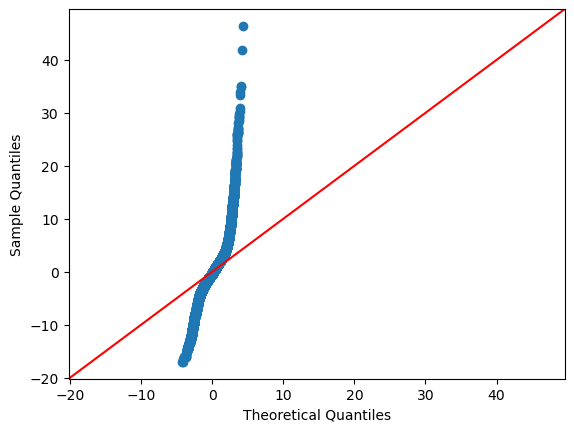

In [528]:
# Display QQ plot
sm.qqplot(y_test_residuals, line ='45')
plt.show()

QQ plot di atas menggambarkan  
X - Axis merupakan kuartal dari distribusi normal
Y - Axis merupakan kuartal dari data  
sehingga garis merah menggambarkan kuartal yang sempurna dari distribusi normal, hal ini dapat disimpulkan semakin dekat dengan garis merah, maka semakin mirip dengan distribusi normal.  

Plot di atas menggambarkan distribusi data tidak normal dan karena kurvatur membelok ke atas, hal ini menandakan data skewed right

<vspace>

### ***Asumsi 4 : No Auto Correlation***

---

Asumsi selanjutnya bahwa tidak terdapat korelasi antar residu, yang menandakan residual independen. Untuk mengecek korelasi dapat menggunakan tes Durbin-Watson

In [529]:
# Perform Durbin-Watson test

from statsmodels.stats.stattools import durbin_watson

durbin_watson(y_test_residuals)

1.97495934577903

The test statistic is 1.97. Since this is within the rang of 1.5 and 2.5, we can consider autocorrelation not to be problematic in this regression model

<vspace>

### ***Asumsi 6 : Homoscedasity***

---

Menguji homoskedasitas itu untuk melihat apakah kesalahan punya variasi yang konstan. Maksudnya, kita ingin tahu apakah titik-titik data punya penyimpangan yang konsisten dari garis nol. Kalau asumsi homoskedasitas ini tidak terpenuhi, artinya kita punya heteroskedasitas.

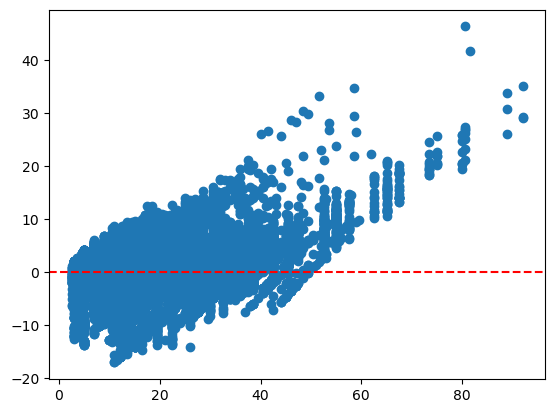

In [530]:
# Check homoscedasticioty

plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Kita dapat melihat bahwa y_test_residuals dan y_test memiliki pola linear yang cenderung naik. Ini berarti terdapat heteroskedasitas. Dengan demikian, asumsi ini juga dilanggar.  
Selanjutnya dilakukan penyimpanan model yang nantinya akan digunakan di dalam proses mode inference

---
---

<vspace>

## ***Model Saving***

---

In [531]:
#Save the files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_cols, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

with open('ohe_encoder.pkl', 'wb') as file_6:
  pickle.dump(ohe, file_6)

Setelah saving dilakukan selanjutnya dilakukan model inference. Tahap ini dilakukan untuk melakukan prediksi dengan mengambil data random

---
---

<vspace>

## ***Model Inference***

---

Pemanggilan kembali data inference yang telah diambil

In [532]:
# Get sample data for inferential from df
data_inf

,timestamp,hour,day,month,datetime,source,destinasi,tipe_taksi,product_id,nama,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543423e+09,16,28,11,2018-11-28 16:35:07,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0,1543420800,33.75,1543399200,42.6,1543438800,29.97,1543399200,36.58,1543438800


Selanjutnya dilakukan loading data yang telah di save

In [533]:
# load the file
with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_cols = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_cols = json.load(file_2)

with open('model_scaler.pkl', 'rb') as file_3:
  scaler = pickle.load(file_3)

with open('model_encoder.pkl', 'rb') as file_4:
  encoder = pickle.load(file_4)

with open('model_lin_reg.pkl', 'rb') as file_5:
  model_lin_reg = pickle.load(file_5)

with open('ohe_encoder.pkl', 'rb') as file_6:
  ohe = pickle.load(file_6)

Selanjutnya mengambil data inference yang kategorikal dan numerikal

In [534]:
# Mengambil data inference kategorikal
data_inf_cat= data_inf[list_cat_cols]
# Mengambil data inference numerikal
data_inf_num = data_inf[list_num_cols]

In [535]:
# Menggunakan data untuk scaling
data_inf_num_scaled= scaler.transform(data_inf_num)
data_inf_num_scaled

array([[0.27844712]])

Selanjutnya memisahkan lonjakan_pengali dari data_inf_lonjakan dikarenakan perbedaan metode encoding, yaitu menggunakan ordinal encoding

In [536]:
# Pemisahan lonjakan_pengali dari data
data_inf_lonjakan= data_inf_cat['lonjakan_pengali']
del data_inf_cat['lonjakan_pengali']

In [537]:
# mengubah bentuk ke dalam array
data_inf_lonjakan.values.reshape(-1,1)

array([[1.]])

In [538]:
# Melakukan fit pada data_inf_lonjakan
encoder.fit(data_inf_lonjakan.values.reshape(-1,1))

OrdinalEncoder(categories=[['1.0', '1.25', '1.5', '1.75', '2.0', '2.5', '3.0']])

Setelah melakukan fit, selanjutnya transformasi dilakukan 

In [539]:
# Transform data_inf_lonjakan
data_inf_lonjakan_encoded = encoder.transform(data_inf_lonjakan.values.reshape(-1,1))

In [540]:
# Menampilkan data_inf_lonjakan_encoded
data_inf_lonjakan_encoded

array([[0.]])

Selanjutnya dilakukan one hot encoding pada data_inf_cat

In [541]:
data_inf_cat

,source,destinasi,nama
0,West End,North End,UberX


In [542]:
# transformasi data_inf_cat
data_inf_cat_encoded = ohe.transform(data_inf_cat).toarray()

In [543]:
data_inf_cat_encoded

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.]])

Selanjutnya 3 array tersebut akan digabungkan menjadi 1

In [544]:
# Penggabungan 3 array
WAV = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded, data_inf_lonjakan_encoded], axis = 1)

In [545]:
# ignore warning 
warnings.filterwarnings("ignore")

Selanjutnya prediksi dilakukan

In [546]:
# menggunakan metode regresi linear untuk memprediksi harga taksi
prediksi_WAV = model_lin_reg.predict(WAV)

print(f'harga taksi adalah {int(prediksi_WAV)}')

harga taksi adalah 5


---
---

<vspace>

## ***Kesimpulan***

---

Dalam memprediksi harga taksi, pembuatan model machine learning menggunakan regresi linear. Analisis ini menunjukkan bahwa hubungan antara fitur dan label dalam model regresi tidak linear, melanggar asumsi bahwa korelasi antara fitur dan label harus tinggi sementara korelasi antar fitur harus rendah atau tidak ada. Analisis residual mengungkapkan masalah seperti non-linearitas, heteroskedastisitas, dan data yang tidak terdistribusi normal. Oleh karena itu, model ini perlu disempurnakan lebih lanjut untuk meningkatkan akurasi prediksi dan memastikan asumsi-asumsi regresi terpenuhi seperti menggunakan algoritma regresi seperti Regresi Polinomial. 

---
---